# General information
 * Author: Joris Busink, Junior Teacher Physics Education.
 * Date: Monday, 8th August.
 * About: FFT Data processing script for high-speed camera. 

## Load packages
I load the following packages: numpy, matplotlib.pyplot, pandas. These pacakges are always usefull in doing nummerical calculations using Python. In a later stage, I will use the functions Curve_fit, fft, rfft and rfftfreq. I load these in as well.

In [7]:
# %matplotlib widget 
#requires package ipympl installed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import curve_fit
from scipy.fft import fft, rfft,rfftfreq
np.set_printoptions(precision=4,threshold =9,suppress=True)  #Compact display.

cwd = os.getcwd()
cwd= os.path.split(os.getcwd())[0]

## Read data
In this section we read in the raw data, furthermore, I do some small filtering in the data. 
<br>
### Necessary commands
 * Line 1: make dataframe 'df' that contains all data.<br>
 * Line 3-5: change the nummerical separator from a comma to a dot (In the Netherlands we use comma, international standard is a dot.)<br>
 * Line 6-7: remove "Not-a-Number", nan, values from the list.<br>

### Optional commands
* Line 8-10: make a subselection of the data. Handling large datafiles can be very slow and annoying. 
<br>


In [ ]:
df=pd.read_csv(cwd+'/data/Slingerdata_1.mqa', sep='\t',header=0)
Time = df['Time'].str.replace(',', '.').astype(float).to_list()
Xpos = df['Point #1.X'].str.replace(',', '.').astype(float).to_list()
Ypos = df['Point #1.Y'].str.replace(',', '.').astype(float).to_list()
Xpos = [x for x in Xpos if str(x) != 'nan']
Ypos = [x for x in Ypos if str(x) != 'nan']
t=np.asarray(Time[:15000])
scaling = 1/1000 #scaling factor from pixel to [m]
x = np.asarray(Xpos[0:15000])*scaling 
y = np.asarray(Ypos[0:15000])*scaling 

In [ ]:

def model(x,a,b,c,d,e,f,g):
    return a+b*np.sin(c*x+d)+e*np.sin(f*x+g)

# popt, pcov = curve_fit(model,Time,Xpos,p0=[0.3,0.1,4,0,0.0001,0,0])
# fig,axes=plt.subplots(1,1,figsize=(8,3))
# axes.scatter(Time[0::1],Xpos[0::1], color = 'black', s = 15, marker ='+')
# axes.plot(np.linspace(0,5,1001),model(np.linspace(0,5,1001),*popt), color ='darkred', lw = 2)
# axes.set_xlim(0,5)
# axes.set_ylim(0.2,0.5)

# axes.set_xlabel('Time (s)', fontsize=12)
# axes.set_ylabel('X position (m)',fontsize=12)
# axes.tick_params(direction="in")

# # axes.text(1,0.25,r"$f(t) = x_{0} + A(t)\cdot\sin(\omega t+\phi)$", color = 'black', fontsize=12)
# axes.text(1,0.43,"f(t) = " + "{:.2f}".format(popt[0]) +" + "+ "{:.2f}".format(popt[1])
#           +r"sin(" +"{:.2f}".format(popt[2])+ "t"+"{:.2f}".format(popt[3]) + ")"  , color = 'darkred', fontsize=12)
# plt.savefig('Munib/Slinger_xdirection.svg')
# plt.tight_layout()
# plt.show()

# popt, pcov = curve_fit(model,Time,Ypos,p0=[0.485,0.0005,9.2,0,0.001,4.6,0])

# fig,axes=plt.subplots(1,1,figsize=(8,3))
# axes.scatter(Time[0::1],Ypos[0::1], color = 'black', s = 15, marker ='+')
# # axes.plot(np.linspace(0,5,1001),model(np.linspace(0,5,1001),0.487,0.001,9.2,-.90+1.57,0.00,4.64,0), color ='darkred', lw = 2)
# axes.plot(np.linspace(0,5,1001),model(np.linspace(0,5,1001),*popt), color ='darkred', lw = 2)

# axes.set_xlim(0,5)
# axes.set_ylim(0.48,0.5)

# axes.set_xlabel('Time (s)', fontsize=12)
# axes.set_ylabel('y position (m)',fontsize=12)
# axes.tick_params(direction="in")

# # axes.text(1,0.25,r"$f(t) = x_{0} + A(t)\cdot\sin(\omega t+\phi)$", color = 'black', fontsize=12)
# axes.text(0.5,0.495,"f(t) = " + "{:.4f}".format(popt[0]) +" + "+ "{:.3f}".format(popt[1])
#           +r"sin(" +"{:.2f}".format(popt[2])+ "t"+"{:.2f}".format(popt[3]) + ")"  +" + "+ "{:.4f}".format(popt[4])
#           +r"sin(" +"{:.2f}".format(popt[5])+ "t"+"{:.2f}".format(popt[6]) + ")"  , color = 'darkred', fontsize=12)
# plt.savefig('Munib/Slinger_ydirection.svg')
# plt.tight_layout()
# plt.show()
Time = np.asarray(Time)

from scipy.fft import fft, fftfreq
# Number of sample points
A_signal_fft = rfft(np.asarray(Ypos)-np.mean(Ypos))
frequencies = rfftfreq(np.size(Time),1/126.)

fig,axes=plt.subplots(1,1, figsize=(8,4))
axes.plot(frequencies*2*np.pi, np.abs(A_signal_fft), lw=1, c='darkred')
axes.scatter(frequencies*2*np.pi, np.abs(A_signal_fft), s=50, c='black',marker='+')

axes.set_xlim(.1,100)
axes.set_ylim(0.001,10)
axes.set_yscale('log')
axes.set_xscale('log')

axes.set_xlabel("frequency [Hz]",fontsize=12)
axes.set_ylabel(r"$|\mathcal{F}(A_{signal})|$",fontsize=12)
axes.tick_params(direction="in")
plt.savefig('Munib/FFT_Mean_Slinger_Ydirection.svg')
plt.tight_layout()
plt.show()
# print(0.72912146*7,0.72912146*13)

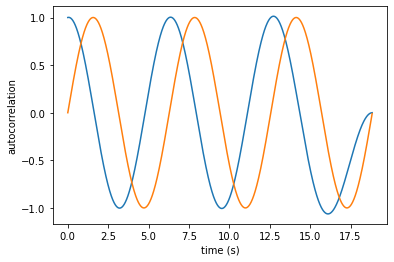

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def acor(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size/2.:]
# generate some data
time = np.arange(0.,6*np.pi,0.01)
y = np.sin(time)

from numpy import *
import numpy as N
import pylab as P



def estimated_autocorrelation(x):
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = N.correlate(x, x, mode = 'full')[-n:]
    #assert N.allclose(r, N.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(N.arange(n, 0, -1)))
    return result

P.plot(time,estimated_autocorrelation(y))
P.plot(time,y)

P.xlabel('time (s)')
P.ylabel('autocorrelation')
P.show()